# **THE SPARKS FOUNDATION**
> DATA SCIENCE & BUSINESS ANALYTICS INTERNSHIP

### TASK 2 :  Prediction using UnSupervised Machine Learning
>      By : Satyam Dwivedi 

>      Btech EE , 2022 Batch

>      SGSITS , Indore

## Problem Statement:
> From the given `Iris` dataset, predict the optimum number of clusters and represent it visually.

## Step1:
> Importing the required python libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster

## Step 2:
> Reading the data from csv file


In [4]:
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Step 3:
> Determining `Features` (attributes) and `Labels` (output)... 
> **Here we have 4 features i.e. `SepalLengthCm`,`SepalWidthCm`,`PetalLengthCm	`,`PetalWidthCm`, and one label i.e. `Species`**

as it is unsupervised learning task , so we will not use the given labels. Lets slice the features of given data

In [5]:
iris_x = iris.iloc[:,1:-1].copy()
iris_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Step 4:
> analysing the features data

In [6]:
iris_x.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Step 5:
> scaling the features

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_x = scaler.fit_transform(iris_x)
iris_x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## Step 6:
> Finding optimum number of clusters using `elbow technique`

Text(0, 0.5, 'WCSS')

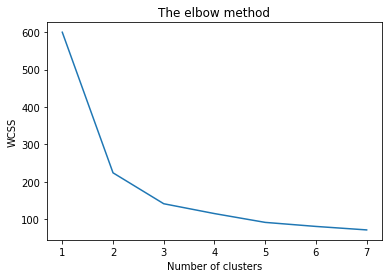

In [11]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares
for k in range (1,8):
    km_model = KMeans(n_clusters=k)
    km_model.fit(iris_x)
    wcss.append(km_model.inertia_)
    
plt.plot(range(1,8),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Thus we can see for the given features:
> `optimum no. of clusters` : k = 3

## Step 7:
> for k = 3 making clusters using KMeans algorithm

In [12]:
km_model = KMeans(n_clusters=3)
y =km_model.fit_predict(iris_x)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Step 8:
> separating these 3 clusters and finding thier centroids

In [13]:
clus_0 = iris_x[y==0]
clus_1 = iris_x[y==1]
clus_2 = iris_x[y==2]

centroids = km_model.cluster_centers_
centroids

array([[-0.05021989, -0.88029181,  0.34753171,  0.28206327],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 1.13597027,  0.09659843,  0.996271  ,  1.01717187]])

## Step 9:
>  Visualising the clusters - On the first two features i.e. column 0 and 1


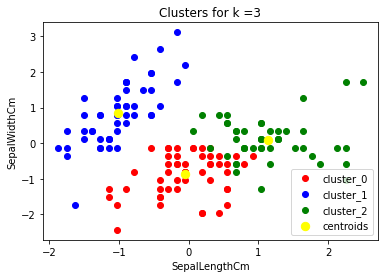

In [14]:
plt.scatter(clus_0[:,0],clus_0[:,1], color ='red',label = 'cluster_0')
plt.scatter(clus_1[:,0],clus_1[:,1], color ='blue',label = 'cluster_1')
plt.scatter(clus_2[:,0],clus_2[:,1], color ='green',label = 'cluster_2')
plt.scatter(centroids[:,0], centroids[:,1], color ='yellow',label = 'centroids',s=70)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Clusters for k =3')
plt.legend()